In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import glob

files_path = glob.glob("C:\\Python\\Recommender system\\Book recommender\\*.csv")
files_path

['C:\\Python\\Recommender system\\Book recommender\\Books.csv',
 'C:\\Python\\Recommender system\\Book recommender\\Ratings.csv',
 'C:\\Python\\Recommender system\\Book recommender\\Users.csv']

#### LOAD & CHECK DATA

In [2]:
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
import re
from PIL import Image
import requests
import random
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.corpus import stopwords

In [3]:
books = pd.read_csv("C:\\Python\\Recommender system\\Book recommender\\Books.csv")

books.head()

C:\Users\blaze\AppData\Local\Temp\ipykernel_21552\1781972774.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv("C:\\Python\\Recommender system\\Book recommender\\Books.csv")


ISBN                                         Book-Title  \
0  0195153448                                Classical Mythology   
1  0002005018                                       Clara Callan   
2  0060973129                               Decision in Normandy   
3  0374157065  Flu: The Story of the Great Influenza Pandemic...   
4  0393045218                             The Mummies of Urumchi   

            Book-Author Year-Of-Publication                   Publisher  \
0    Mark P. O. Morford                2002     Oxford University Press   
1  Richard Bruce Wright                2001       HarperFlamingo Canada   
2          Carlo D'Este                1991             HarperPerennial   
3      Gina Bari Kolata                1999        Farrar Straus Giroux   
4       E. J. W. Barber                1999  W. W. Norton &amp; Company   

                                         Image-URL-S  \
0  http://images.amazon.com/images/P/0195153448.0...   
1  http://images.amazon.com/images/P/0002005018.0...   
2  http://images.amazon.com/images/P/0060973129.0...   
3  http://images.amazon.com/images/P/0374157065.0...   
4  http://images.amazon.com/images/P/0393045218.0...   

                                         Image-URL-M  \
0  http://images.amazon.com/images/P/0195153448.0...   
1  http://images.amazon.com/images/P/0002005018.0...   
2  http://images.amazon.com/images/P/0060973129.0...   
3  http://images.amazon.com/images/P/0374157065.0...   
4  http://images.amazon.com/images/P/0393045218.0...   

                                         Image-URL-L  
0  http://images.amazon.com/images/P/0195153448.0...  
1  http://images.amazon.com/images/P/0002005018.0...  
2  http://images.amazon.com/images/P/0060973129.0...  
3  http://images.amazon.com/images/P/0374157065.0...  
4  http://images.amazon.com/images/P/0393045218.0...

In [4]:
ratings = pd.read_csv("C:\\Python\\Recommender system\\Book recommender\\Ratings.csv")
ratings.head()

User-ID        ISBN  Book-Rating
0   276725  034545104X            0
1   276726  0155061224            5
2   276727  0446520802            0
3   276729  052165615X            3
4   276729  0521795028            6

In [5]:
users = pd.read_csv("C:\\Python\\Recommender system\\Book recommender\\Users.csv")
users.head()

User-ID                            Location   Age
0        1                  nyc, new york, usa   NaN
1        2           stockton, california, usa  18.0
2        3     moscow, yukon territory, russia   NaN
3        4           porto, v.n.gaia, portugal  17.0
4        5  farnborough, hants, united kingdom   NaN

In [6]:
print("Books Shape: " ,books.shape )
print("Ratings Shape: " ,ratings.shape )
print("Users Shape: " ,users.shape )

Books Shape:  (271360, 8)
Ratings Shape:  (1149780, 3)
Users Shape:  (278858, 3)


In [7]:
print("Any null values in Books:\n" ,books.isnull().sum())
print("Any null values in Ratings:\n ",ratings.isnull().sum())
print("Any null values in Users:\n",users.isnull().sum())

Any null values in Books:
 ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64
Any null values in Ratings:
  User-ID        0
ISBN           0
Book-Rating    0
dtype: int64
Any null values in Users:
 User-ID          0
Location         0
Age         110762
dtype: int64


#### PREPROCESSING

In [8]:
books_data = books.merge(ratings, on="ISBN")

books_data.head()

ISBN           Book-Title           Book-Author Year-Of-Publication  \
0  0195153448  Classical Mythology    Mark P. O. Morford                2002   
1  0002005018         Clara Callan  Richard Bruce Wright                2001   
2  0002005018         Clara Callan  Richard Bruce Wright                2001   
3  0002005018         Clara Callan  Richard Bruce Wright                2001   
4  0002005018         Clara Callan  Richard Bruce Wright                2001   

                 Publisher                                        Image-URL-S  \
0  Oxford University Press  http://images.amazon.com/images/P/0195153448.0...   
1    HarperFlamingo Canada  http://images.amazon.com/images/P/0002005018.0...   
2    HarperFlamingo Canada  http://images.amazon.com/images/P/0002005018.0...   
3    HarperFlamingo Canada  http://images.amazon.com/images/P/0002005018.0...   
4    HarperFlamingo Canada  http://images.amazon.com/images/P/0002005018.0...   

                                         Image-URL-M  \
0  http://images.amazon.com/images/P/0195153448.0...   
1  http://images.amazon.com/images/P/0002005018.0...   
2  http://images.amazon.com/images/P/0002005018.0...   
3  http://images.amazon.com/images/P/0002005018.0...   
4  http://images.amazon.com/images/P/0002005018.0...   

                                         Image-URL-L  User-ID  Book-Rating  
0  http://images.amazon.com/images/P/0195153448.0...        2            0  
1  http://images.amazon.com/images/P/0002005018.0...        8            5  
2  http://images.amazon.com/images/P/0002005018.0...    11400            0  
3  http://images.amazon.com/images/P/0002005018.0...    11676            8  
4  http://images.amazon.com/images/P/0002005018.0...    41385            0

In [9]:
df=books_data.copy()
df.dropna(inplace=True)
df.reset_index(drop=True,inplace=True)
df.drop(columns=["ISBN","Year-Of-Publication","Image-URL-S","Image-URL-M"],axis=1,inplace=True)
df.drop(index=df[df["Book-Rating"]==0].index,inplace=True)
df["Book-Title"]=df["Book-Title"].apply(lambda x: re.sub("[\W_]+"," ",x).strip())
df.head()

Book-Title           Book-Author              Publisher  \
1  Clara Callan  Richard Bruce Wright  HarperFlamingo Canada   
3  Clara Callan  Richard Bruce Wright  HarperFlamingo Canada   
5  Clara Callan  Richard Bruce Wright  HarperFlamingo Canada   
8  Clara Callan  Richard Bruce Wright  HarperFlamingo Canada   
9  Clara Callan  Richard Bruce Wright  HarperFlamingo Canada   

                                         Image-URL-L  User-ID  Book-Rating  
1  http://images.amazon.com/images/P/0002005018.0...        8            5  
3  http://images.amazon.com/images/P/0002005018.0...    11676            8  
5  http://images.amazon.com/images/P/0002005018.0...    67544            8  
8  http://images.amazon.com/images/P/0002005018.0...   116866            9  
9  http://images.amazon.com/images/P/0002005018.0...   123629            9

In [18]:
sortrating = df.groupby("Book-Title").count()["Book-Rating"].reset_index().sort_values(by="Book-Rating", ascending=False)
sortrating

Book-Title  Book-Rating
109465                           The Lovely Bones A Novel          707
131333                                        Wild Animus          581
101988                                  The Da Vinci Code          494
115394                            The Secret Life of Bees          406
111177                          The Nanny Diaries A Novel          393
...                                                   ...          ...
54193                                   Joy for the Heart            1
54192   Joy comes with the morning A handbook of Chris...            1
54191                                       Joy amp Anger            1
54190   Joy Street A Wartime Romance in Letters 1940 1942            1
134549                                  Ã Â thique en toc            1

[134550 rows x 2 columns]

#### POPULARITY BASED RECOMMENDATION SYSTEM
Popularity based recommendation systems are based on the rating of items by all the users.\
Popularity based recommendation systems works with the trend. It basically uses the items which are in trend right now.

In [22]:
def popular_books(df, n=100):
    rating_count=df.groupby("Book-Title").count()["Book-Rating"].reset_index()
    rating_count.rename(columns={"Book-Rating":"NumberOfVotes"},inplace=True)

    rating_average = df.groupby("Book-Title")["Book-Rating"].mean().reset_index()
    rating_average.rename(columns={"Book-Rating":"AverageRatings"},inplace=True)

    popularBooks = rating_count.merge(rating_average, on="Book-Title")

    def weighted_rate(x):
        v=x["NumberOfVotes"]
        R=x["AverageRatings"]

        return ((v*R) + (m*C)) / (v+m)
    
    C=popularBooks["AverageRatings"].mean()
    m = popularBooks["NumberOfVotes"].quantile(0.9)

    popularBooks = popularBooks[popularBooks["NumberOfVotes"]>=250]
    popularBooks["Popularity"]=popularBooks.apply(weighted_rate,axis=1)
    popularBooks=popularBooks.sort_values(by="Popularity",ascending=False)

    return popularBooks[["Book-Title","NumberOfVotes","AverageRatings","Popularity"]].reset_index(drop=True).head(n)



C:\Users\blaze\AppData\Local\Temp\ipykernel_21552\588663467.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


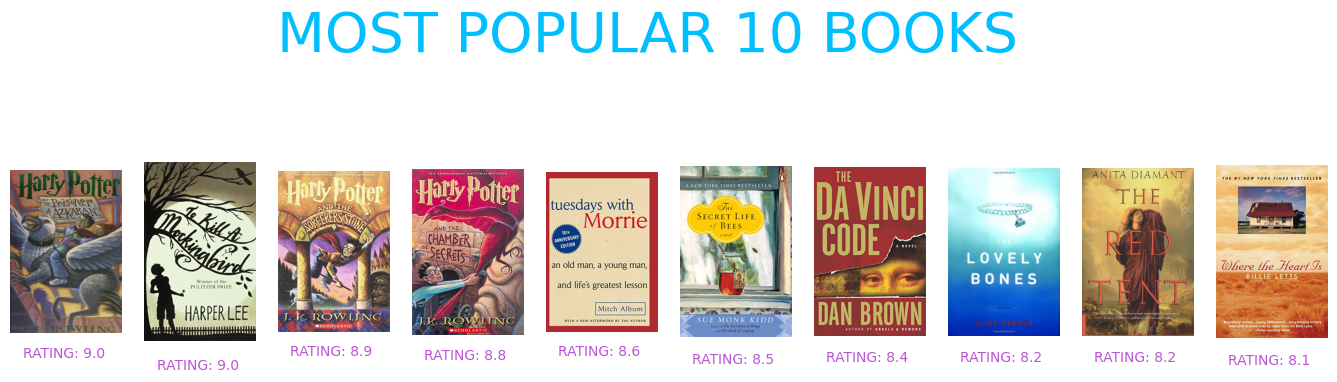

In [38]:
import io
import urllib.request as urllib2
n=10
top_ten=pd.DataFrame(popular_books(df,10))
fig,ax=plt.subplots(1,10,figsize=(17,5))
fig.suptitle("MOST POPULAR 10 BOOKS",fontsize=40,color="deepskyblue")
for i in range(len(top_ten["Book-Title"].tolist())):
    url=df.loc[df["Book-Title"]==top_ten["Book-Title"].tolist()[i],"Image-URL-L"][:1].values[0]
    headers={'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:60.0) Gecko/20100101 Firefox/60.0'}
    img=Image.open(requests.get(url,stream=True, headers=headers).raw)
    ax[i].imshow(img)
    ax[i].axis("off")
    ax[i].set_title("RATING: {} ".format(round(df[df["Book-Title"]==top_ten["Book-Title"].tolist()[i]]["Book-Rating"].mean(),1)),y=-0.20,color="mediumorchid",fontsize=10)
    fig.show()

#### ITEM-BASED COLLABORATIVE FILTERING

In [39]:
def item_based(bookTitle):
    bookTitle = str(bookTitle)

    if bookTitle in df["Book-Title"].values:
        rating_count = pd.DataFrame(df["Book-Title"].value_counts())
        rare_books = rating_count[rating_count["Book-Title"]<=200].index
        common_books=df[~df["Book-Title"].isin(rare_books)]

        if bookTitle in rare_books:
            most_common = pd.Series(common_books["Book-Title"].unique()).sample(3).values
            print("No Recommendations for this Book ☹️ \n ")
            print("YOU MAY TRY: \n ")
            print("{}".format(most_common[0]), "\n")
            print("{}".format(most_common[1]), "\n")
            print("{}".format(most_common[2]), "\n")
        else:
            common_books_pivot=common_books.pivot_table(index=["User-ID"],columns=["Book-Title"],values="Book-Rating")
            title=common_books_pivot[bookTitle]
            recommendation_df=pd.DataFrame(common_books_pivot.corrwith(title).sort_values(ascending=False)).reset_index(drop=False)

            if bookTitle in [title for title in recommendation_df["Book-Title"]]:
                recommendation_df=recommendation_df.drop(recommendation_df[recommendation_df["Book-Title"]==bookTitle].index[0])
                
            less_rating=[]
            for i in recommendation_df["Book-Title"]:
                if df[df["Book-Title"]==i]["Book-Rating"].mean() < 5:
                    less_rating.append(i)
            if recommendation_df.shape[0] - len(less_rating) > 5:
                recommendation_df=recommendation_df[~recommendation_df["Book-Title"].isin(less_rating)]
                
            recommendation_df=recommendation_df[0:5]
            recommendation_df.columns=["Book-Title","Correlation"]

            fig, ax = plt.subplots(1,5,figsize=(17,5))
            fig.suptitle("WOULD YOU LIKE to TRY THESE BOOKS?",fontsize=40,color="deepskyblue")
            for i in range(len(recommendation_df["Book-Title"].tolist())):
                headers={'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:60.0) Gecko/20100101 Firefox/60.0'}
                url=df.loc[df["Book-Title"]==recommendation_df["Book-Title"].tolist()[i],"Image-URL-L"][:1].values[0]
                img=Image.open(requests.get(url,stream=True, headers=headers).raw)
                ax[i].imshow(img)
                ax[i].axis("off")
                ax[i].set_title("RATING: {} ".format(round(df[df["Book-Title"]==recommendation_df["Book-Title"].tolist()[i]]["Book-Rating"].mean(),1)),y=-0.20,color="mediumorchid",fontsize=22)
                fig.show()
    else:
        print("❌ COULD NOT FIND ❌")

C:\Users\blaze\AppData\Local\Temp\ipykernel_21552\2312803400.py:43: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


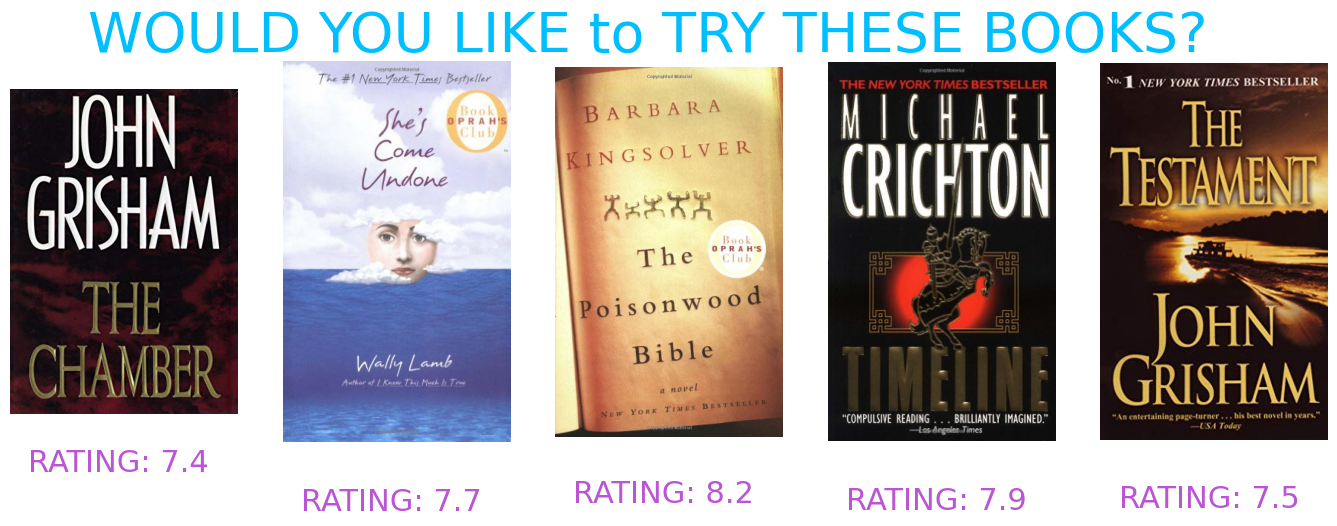

In [40]:
item_based("Me Talk Pretty One Day")

In [41]:
item_based("From One to One Hundred")

No Recommendations for this Book ☹️ 
 
YOU MAY TRY: 
 
The Chamber 

Harry Potter and the Goblet of Fire Book 4 

The Girls Guide to Hunting and Fishing 



C:\Users\blaze\AppData\Local\Temp\ipykernel_21552\2312803400.py:43: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


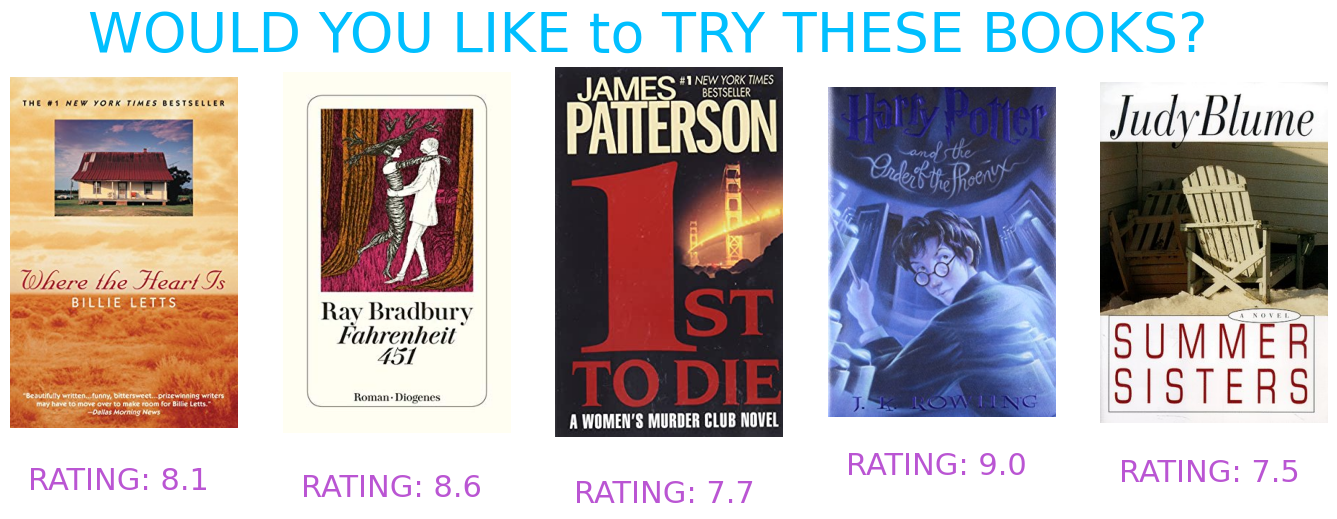

In [42]:
item_based("The Da Vinci Code")

#### USER-BASED COLLABORATIVE FILTERING

In [43]:
new_df=df[df['User-ID'].map(df['User-ID'].value_counts()) > 200]  # Drop users who vote less than 200 times.
users_pivot=new_df.pivot_table(index=["User-ID"],columns=["Book-Title"],values="Book-Rating")
users_pivot.fillna(0,inplace=True)

In [44]:
def users_choice(id):
    
    users_fav=new_df[new_df["User-ID"]==id].sort_values(["Book-Rating"],ascending=False)[0:5]
    return users_fav

In [45]:
def user_based(new_df,id):
    if id not in new_df["User-ID"].values:
        print("❌ User NOT FOUND ❌")
        
        
    else:
        index=np.where(users_pivot.index==id)[0][0]
        similarity=cosine_similarity(users_pivot)
        similar_users=list(enumerate(similarity[index]))
        similar_users = sorted(similar_users,key = lambda x:x[1],reverse=True)[0:5]
    
        user_rec=[]
    
        for i in similar_users:
                data=df[df["User-ID"]==users_pivot.index[i[0]]]
                user_rec.extend(list(data.drop_duplicates("User-ID")["User-ID"].values))
        
    return user_rec

In [46]:
def common(new_df,user,user_id):
    x=new_df[new_df["User-ID"]==user_id]
    recommend_books=[]
    user=list(user)
    for i in user:
        y=new_df[(new_df["User-ID"]==i)]
        books=y.loc[~y["Book-Title"].isin(x["Book-Title"]),:]
        books=books.sort_values(["Book-Rating"],ascending=False)[0:5]
        recommend_books.extend(books["Book-Title"].values)
        
    return recommend_books[0:5]

🟦 USER: 177458 


C:\Users\blaze\AppData\Local\Temp\ipykernel_21552\2890452325.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\blaze\AppData\Local\Temp\ipykernel_21552\2890452325.py:32: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


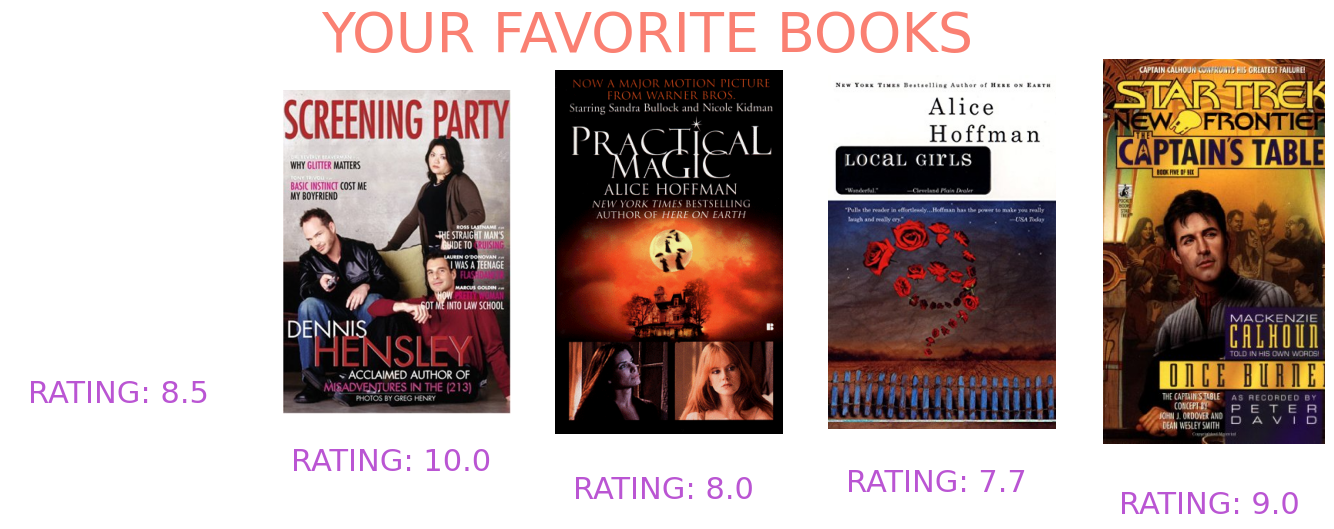

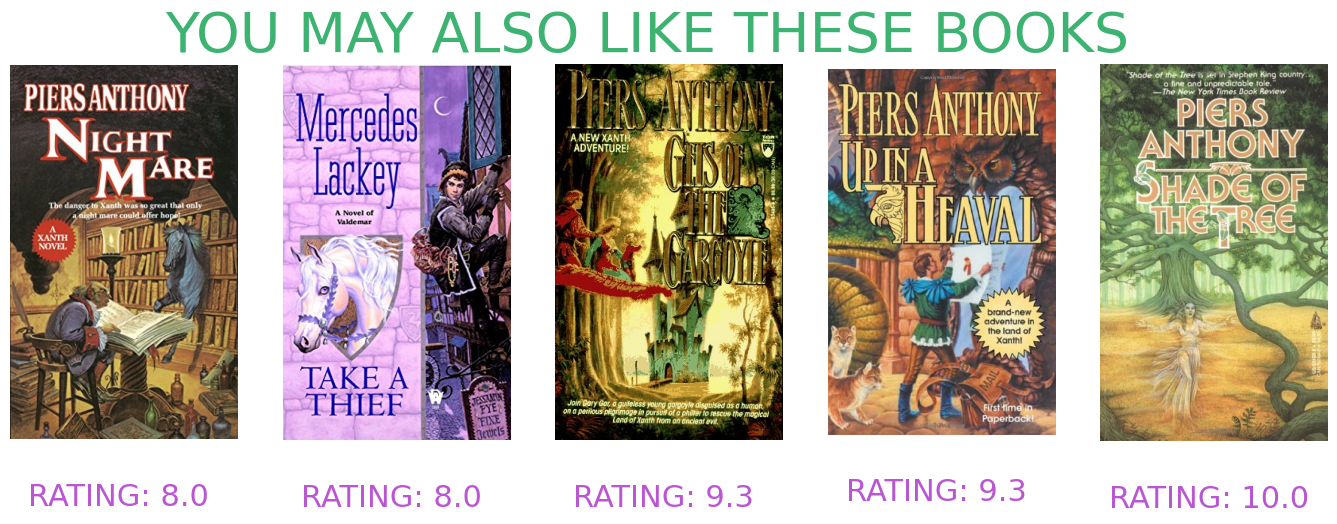

In [55]:
user_id=random.choice(new_df["User-ID"].values)
user_choice_df=pd.DataFrame(users_choice(user_id))
user_favorite=users_choice(user_id)
n=len(user_choice_df["Book-Title"].values)
print("🟦 USER: {} ".format(user_id))
    
fig,ax=plt.subplots(1,n,figsize=(17,5))
fig.suptitle("YOUR FAVORITE BOOKS",fontsize=40,color="salmon")
    
for i in range(n):
        headers={'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:60.0) Gecko/20100101 Firefox/60.0'}
        url=new_df.loc[new_df["Book-Title"]==user_choice_df["Book-Title"].tolist()[i],"Image-URL-L"][:1].values[0]
        img=Image.open(requests.get(url,stream=True, headers=headers).raw)
        ax[i].imshow(img)
        ax[i].axis("off")
        ax[i].set_title("RATING: {} ".format(round(new_df[new_df["Book-Title"]==user_choice_df["Book-Title"].tolist()[i]]["Book-Rating"].mean(),1)),y=-0.20,color="mediumorchid",fontsize=22)
        fig.show()

user_based_rec=user_based(new_df,user_id)
books_for_user=common(new_df,user_based_rec,user_id)
books_for_userDF=pd.DataFrame(books_for_user,columns=["Book-Title"])

fig,ax=plt.subplots(1,5,figsize=(17,5))
fig.suptitle("YOU MAY ALSO LIKE THESE BOOKS",fontsize=40,color="mediumseagreen")
for i in range(5):
    headers={'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:60.0) Gecko/20100101 Firefox/60.0'}
    url=new_df.loc[new_df["Book-Title"]==books_for_userDF["Book-Title"].tolist()[i],"Image-URL-L"][:1].values[0]
    img=Image.open(requests.get(url,stream=True, headers=headers).raw)
    ax[i].imshow(img)
    ax[i].axis("off")
    ax[i].set_title("RATING: {} ".format(round(new_df[new_df["Book-Title"]==books_for_userDF["Book-Title"].tolist()[i]]["Book-Rating"].mean(),1)),y=-0.20,color="mediumorchid",fontsize=22)
    fig.show()


#### CONTENT-BASED COLLABORATIVE FILTERING

In [58]:
def content_based(bookTitle):
    bookTitle = str(bookTitle)

    if bookTitle in df["Book-Title"].values:
        rating_count = pd.DataFrame(df["Book-Title"].value_counts())
        rare_books = rating_count[rating_count["Book-Title"]<=200].index
        common_books = df[~df["Book-Title"].isin(rare_books)]

        if bookTitle in rare_books:
            most_common = pd.Series(common_books["Book-Title"].unique()).sample(3).values
            print("No Recommendations for this Book ☹️ \n ")
            print("YOU MAY TRY: \n ")
            print("{}".format(most_common[0]), "\n")
            print("{}".format(most_common[1]), "\n")
            print("{}".format(most_common[2]), "\n")
        else:
            common_books = common_books.drop_duplicates(subset=["Book-Title"])
            common_books.reset_index(inplace=True)
            common_books["index"] = [i for i in range(common_books.shape[0])]
            targets=["Book-Title","Book-Author","Publisher"]
            common_books["all_features"] = [" ".join(common_books[targets].iloc[i,].values) for i in range(common_books[targets].shape[0])]
            vectorizer=CountVectorizer()
            common_booksVector=vectorizer.fit_transform(common_books["all_features"])
            similarity=cosine_similarity(common_booksVector)
            index=common_books[common_books["Book-Title"]==bookTitle]["index"].values[0]
            similar_books=list(enumerate(similarity[index]))
            similar_booksSorted=sorted(similar_books,key=lambda x:x[1],reverse=True)[1:6]
            books=[]

            for i in range(len(similar_booksSorted)):
                books.append(common_books[common_books["index"]==similar_booksSorted[i][0]]["Book-Title"].item())
            fig,ax=plt.subplots(1,5,figsize=(17,5))
            fig.suptitle("YOU MAY ALSO LIKE THESE BOOKS",fontsize=40,color="chocolate")
                
            for i in range(len(books)):
                headers={'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:60.0) Gecko/20100101 Firefox/60.0'}
                url=common_books.loc[common_books["Book-Title"]==books[i],"Image-URL-L"][:1].values[0]
                img=Image.open(requests.get(url,stream=True, headers=headers).raw)
                ax[i].imshow(img)
                ax[i].axis("off")
                ax[i].set_title("RATING: {}".format(round(df[df["Book-Title"]==books[i]]["Book-Rating"].mean(),1)),y=-0.20,color="mediumorchid",fontsize=22)
                fig.show()

    else:
        print("❌ COULD NOT FIND ❌") 

C:\Users\blaze\AppData\Local\Temp\ipykernel_21552\2002955524.py:42: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


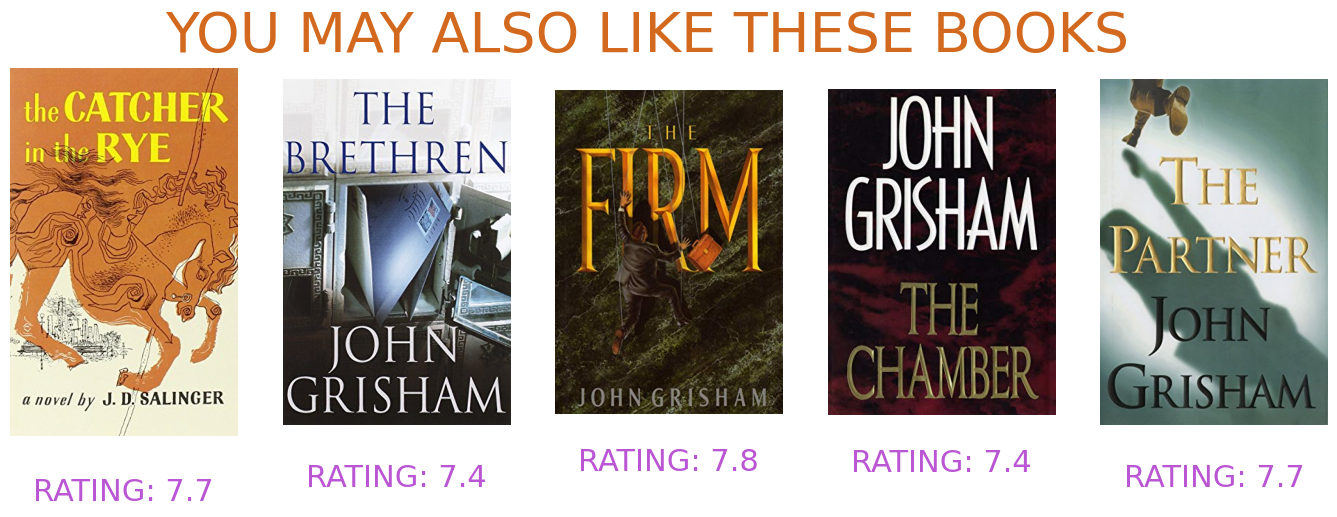

In [59]:
content_based("The Da Vinci Code")

C:\Users\blaze\AppData\Local\Temp\ipykernel_21552\2002955524.py:42: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


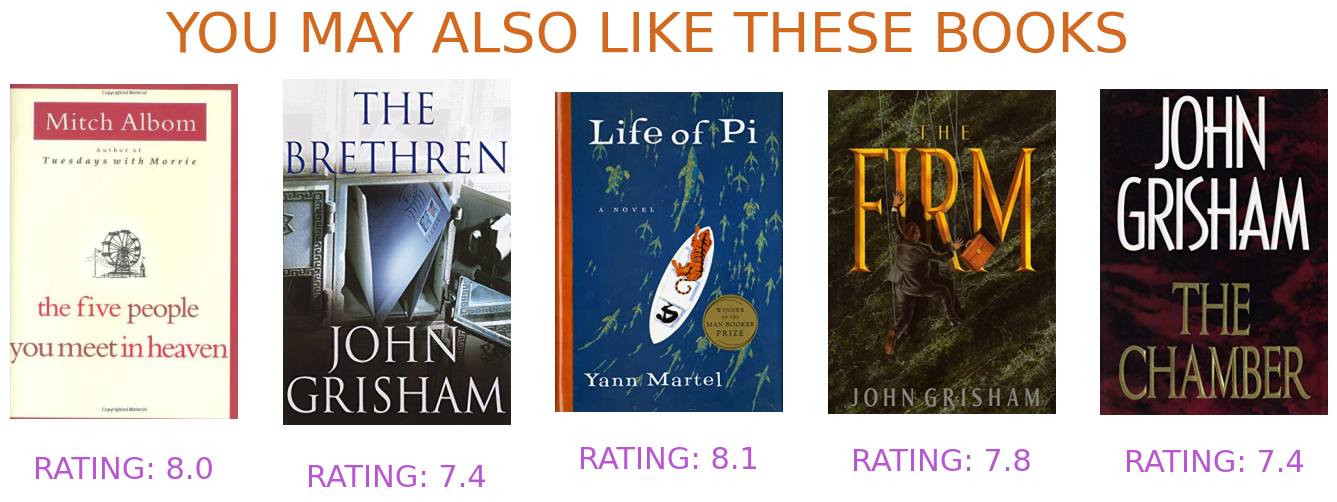

In [60]:
content_based("Tuesdays with Morrie An Old Man a Young Man and Life s Greatest Lesson")